<a href="https://colab.research.google.com/github/sergekamanzi/database-design-assignment/blob/main/banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

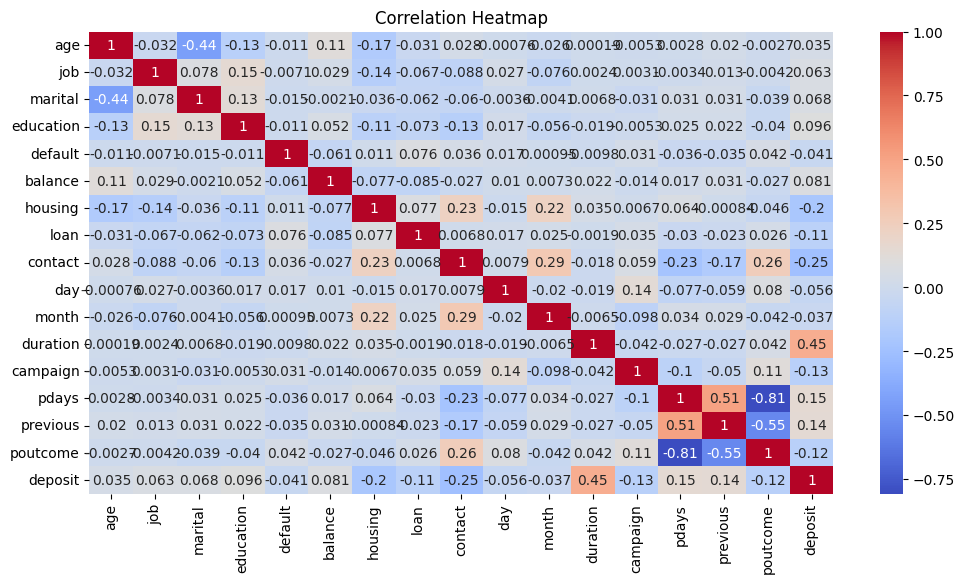

Scaler saved as 'scaler.pkl'
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6365 - loss: 0.6421 - val_accuracy: 0.7931 - val_loss: 0.4723
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7874 - loss: 0.4750 - val_accuracy: 0.7971 - val_loss: 0.4414
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7962 - loss: 0.4526 - val_accuracy: 0.7994 - val_loss: 0.4372
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8104 - loss: 0.4350 - val_accuracy: 0.8030 - val_loss: 0.4339
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8063 - loss: 0.4276 - val_accuracy: 0.8016 - val_loss: 0.4297
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8149 - loss: 0.4192 - val_accuracy: 0.8025 - val_loss: 0.4285
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8171 - loss: 0.4166 - val_accuracy: 0.8030 - val_loss: 0.4255
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8164 - loss: 0.4106 - val_accuracy: 0.8030 - val_

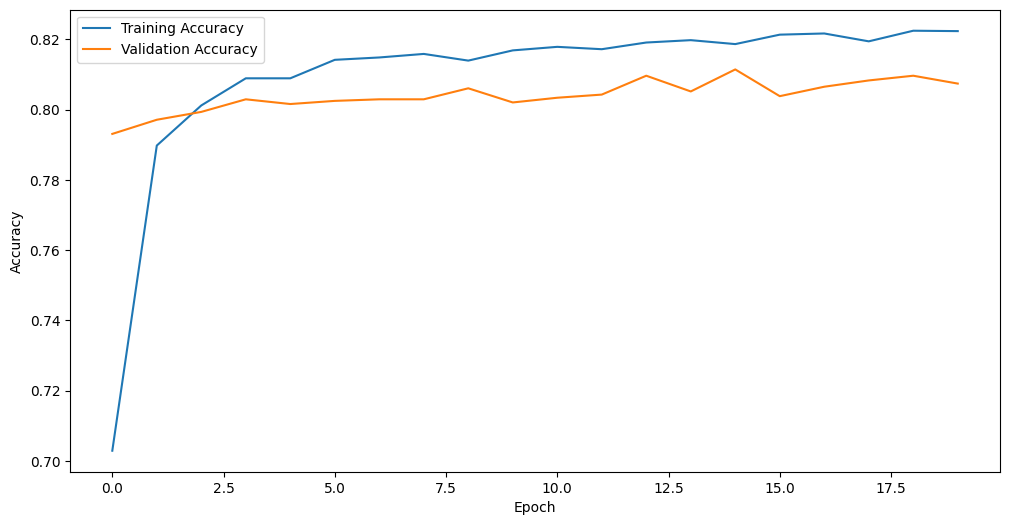

Model saved as 'bank_model.h5'


In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

# Load the dataset
data = pd.read_csv('/content/bank.csv')
data.head()

# Encode categorical variables
label_encoders = {}
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "deposit", "month", "poutcome", "contact"]

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Now that all columns are numeric, we can generate the correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Split data into features (X) and target (y)
X = data.drop(columns=["deposit"])
y = data["deposit"]

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Save the scaler for future use
scaler_filename = "scaler.pkl"
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)
print(f"Scaler saved as '{scaler_filename}'")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
model.save('bank_model.h5')
print("Model saved as 'bank_model.h5'")
